In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report,roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of data.csv')
data.shape

(569, 33)

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


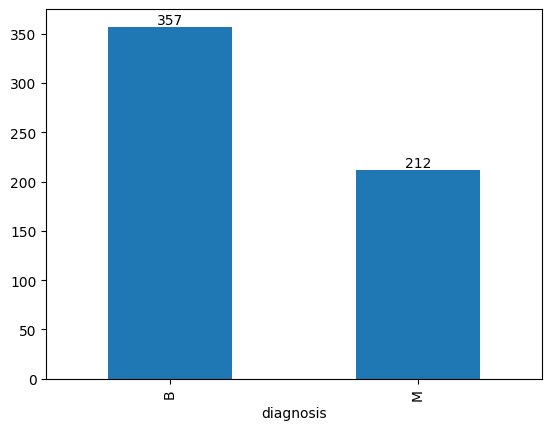

,proportion
diagnosis,
B,62.74
M,37.26


In [4]:
# understanding the target
ax = data['diagnosis'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

round(data['diagnosis'].value_counts(normalize = True)*100,2)

In [5]:
# Based on the observation
# dropping the id and unnamed column
data.drop(['id','Unnamed: 32'],axis = 1 , inplace = True)

# convert the target to binary class
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

# data sample after processing
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# missing value, datatype and sample check
missing_df = pd.DataFrame(data.isnull().sum(),columns = ['Missing_value'])
datatype_df = pd.DataFrame(data.dtypes, columns = ['Datatypes'])
sample_df = data.head(2).T
sample_df = sample_df.rename(columns = {0:'sample_1', 1:'sample_2'})
evaluate_df = pd.concat([missing_df, datatype_df, sample_df],axis = 1)
evaluate_df

,Missing_value,Datatypes,sample_1,sample_2
diagnosis,0,int64,1.000000,1.000000
radius_mean,0,float64,17.990000,20.570000
texture_mean,0,float64,10.380000,17.770000
perimeter_mean,0,float64,122.800000,132.900000
area_mean,0,float64,1001.000000,1326.000000
smoothness_mean,0,float64,0.118400,0.084740
compactness_mean,0,float64,0.277600,0.078640
concavity_mean,0,float64,0.300100,0.086900
concave points_mean,0,float64,0.147100,0.070170
symmetry_mean,0,float64,0.241900,0.181200


In [11]:
# data variable spllit
x = data.drop(['diagnosis'],axis = 1)
y = data['diagnosis']

# train,test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 42)

# dimensions of the split
print('Training data dimensions: ')
print(x_train.shape)
print(y_train.shape)
print('Testing data dimensions: ')
print(x_test.shape)
print(y_test.shape)


Training data dimensions: 
(398, 30)
(398,)
Testing data dimensions: 
(171, 30)
(171,)


In [12]:
# Hyper parameter tuning using GridSearchCV
rf_cv = RandomForestClassifier(random_state = 42)
hyper_fit = GridSearchCV(rf_cv, cv = 5, param_grid = {'criterion':['gini','entropy'],
                                                      'bootstrap':[True,False],
                                                      'max_features':['sqrt','log2',None,'auto']},
                        n_jobs=-1)
hyper_fit.fit(x_train,y_train)
print('Best Parameter form grid Search: ',hyper_fit.best_params_)

Best Parameter form grid Search:  {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt'}


In [13]:
# setting best parameter to the model
best_params = hyper_fit.best_params_
final_model = RandomForestClassifier(**best_params,random_state = 42) # (**)is used in order to unpack the best_params_ dictionary

In [14]:
# OOB - out of bag
final_model.set_params(warm_start = True, oob_score = True, n_jobs = -1)

#Trees
min_estimator = 15
max_estimator = 700

#error dict
error_rate = {}

#iterating the rf for the oob valus wrt to trees
for trees in range(min_estimator, max_estimator+1):
  final_model.set_params(n_estimators = trees)
  final_model.fit(x_train, y_train)
  oob_error = 1 - final_model.oob_score_
  error_rate[trees] = oob_error

In [15]:
final_model.oob_score_
# oob_score_: This is an attribute of the final_model object. It stores the calculated OOB score after the model has been trained with oob_score = True.
# What is the OOB score?

# The OOB score is a way to evaluate the performance of a Random Forest model without needing a separate validation dataset.
# During training, a Random Forest doesn't use all data points for each tree. Some data points are left out (the "out-of-bag" samples).
# The OOB score is calculated by using these left-out samples as a test set for the trees they weren't involved in training.
# It essentially provides an estimate of how well the model generalizes to unseen data.
# In simpler terms:

# Imagine you have a group of students studying for a test. Each student gets a different set of practice questions. The OOB score is like asking each student questions they didn't practice on and seeing how well they do. This gives you an idea of their overall understanding, even without a separate final exam.

# Therefore, final_model.oob_score_ retrieves this performance estimate for your trained Random Forest model. A higher OOB score indicates better performance.

0.957286432160804

In [21]:
oob_data= pd.Series(error_rate)
oob_data.head(20)

,0
15,0.052764
16,0.047739
17,0.045226
18,0.050251
19,0.052764
20,0.057789
21,0.052764
22,0.047739
23,0.047739
24,0.045226


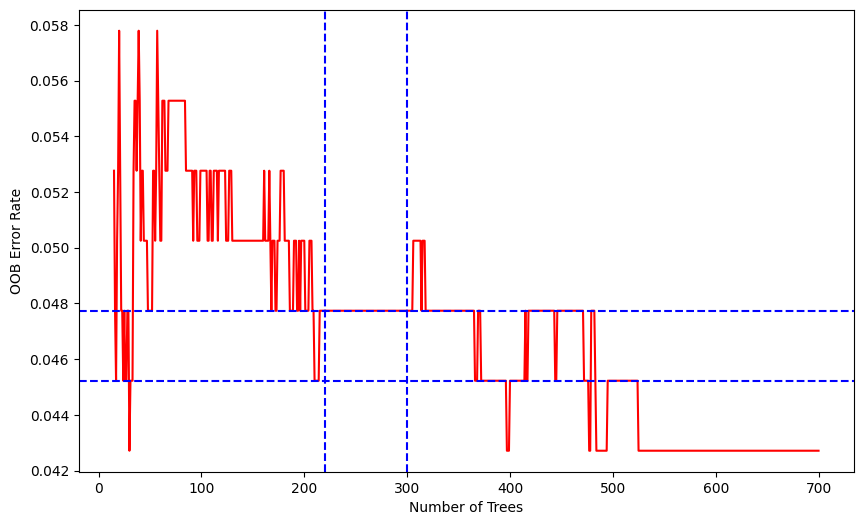

In [20]:
# plotting the oob against the trees
plt.figure(figsize = (10,6))
oob_data.plot(kind = 'line',color = 'red')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.axhline(0.047739,color = 'blue',ls = '--')
plt.axhline(0.045226, color = 'blue',ls ='--')
plt.axvline(220,color = 'blue',ls = '--')
plt.axvline(300, color = 'blue',ls= '--')
plt.show()

In [22]:
print(oob_data.loc[220:301])


220    0.047739
221    0.047739
222    0.047739
223    0.047739
224    0.047739
         ...   
297    0.047739
298    0.047739
299    0.047739
300    0.047739
301    0.047739
Length: 82, dtype: float64


<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', n_estimators=261, n_jobs=-1,
                       random_state=42)>

Trianing Score:  100.0 %
***Testing Score ->  97.08 %
Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



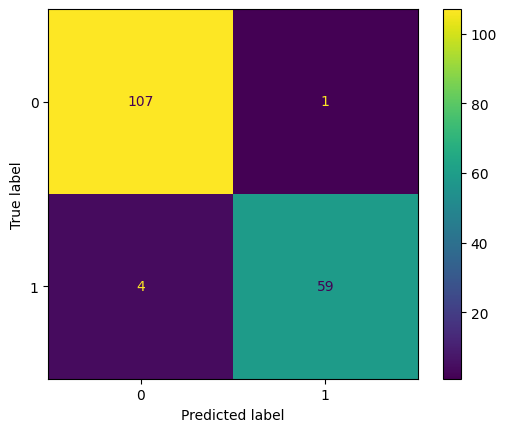

In [28]:
#  refining the trees via OOB
final_model.set_params(n_estimators = 261, warm_start = False, oob_score = False, random_state = 42)
print(final_model.get_params)

# model training
final_model.fit(x_train, y_train)

# training_score
print('\nTrianing Score: ', round(final_model.score(x_train, y_train)*100, 2),'%')

# predictions
y_pred = final_model.predict(x_test)

# metrics
print('***Testing Score -> ',round(accuracy_score(y_test,y_pred)*100,2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print('Classification Report:\n\n', classification_report(y_test, y_pred))


In [42]:
# Variable importance
# array of variables
importance = final_model.feature_importances_
importance = np.sort(importance,kind = 'heapsort')
importance[::-1]

array([0.12621271, 0.12227814, 0.12218307, 0.11050976, 0.06855374,
       0.06011028, 0.0409879 , 0.04057869, 0.03868013, 0.03548984,
       0.02961475, 0.02505396, 0.01987122, 0.01757219, 0.01746074,
       0.01607256, 0.01397808, 0.01343152, 0.00975853, 0.0077204 ,
       0.00765255, 0.00737566, 0.00690488, 0.00685867, 0.00670104,
       0.00666392, 0.00601131, 0.00551141, 0.00546386, 0.00473847])

In [43]:
# index of the above array arranged in descending order of the importances
indx = np.argsort(importance)
indx


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [44]:
# list of independent variables
name_indx = list(data.columns[1:])
name_indx

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [45]:
# dataframe for importance
impurity_df = pd.DataFrame({'mean_impurity':importance, 'column_index':indx})
impurity_df.index = range(1,len(impurity_df)+1) #starting the index from 1
impurity_df['column_name'] = impurity_df['column_index'].apply(lambda x: name_indx[x])
impurity_df= impurity_df[['column_name','mean_impurity']]
impurity_df['percentage_impurity'] = round(impurity_df['mean_impurity']*100,3)
impurity_df['cum_impurity'] = impurity_df['percentage_impurity'].cumsum()
impurity_df

,column_name,mean_impurity,percentage_impurity,cum_impurity
1,radius_mean,0.004738,0.474,0.474
2,texture_mean,0.005464,0.546,1.020
3,perimeter_mean,0.005511,0.551,1.571
4,area_mean,0.006011,0.601,2.172
5,smoothness_mean,0.006664,0.666,2.838
6,compactness_mean,0.006701,0.670,3.508
7,concavity_mean,0.006859,0.686,4.194
8,concave points_mean,0.006905,0.690,4.884
9,symmetry_mean,0.007376,0.738,5.622
10,fractal_dimension_mean,0.007653,0.765,6.387


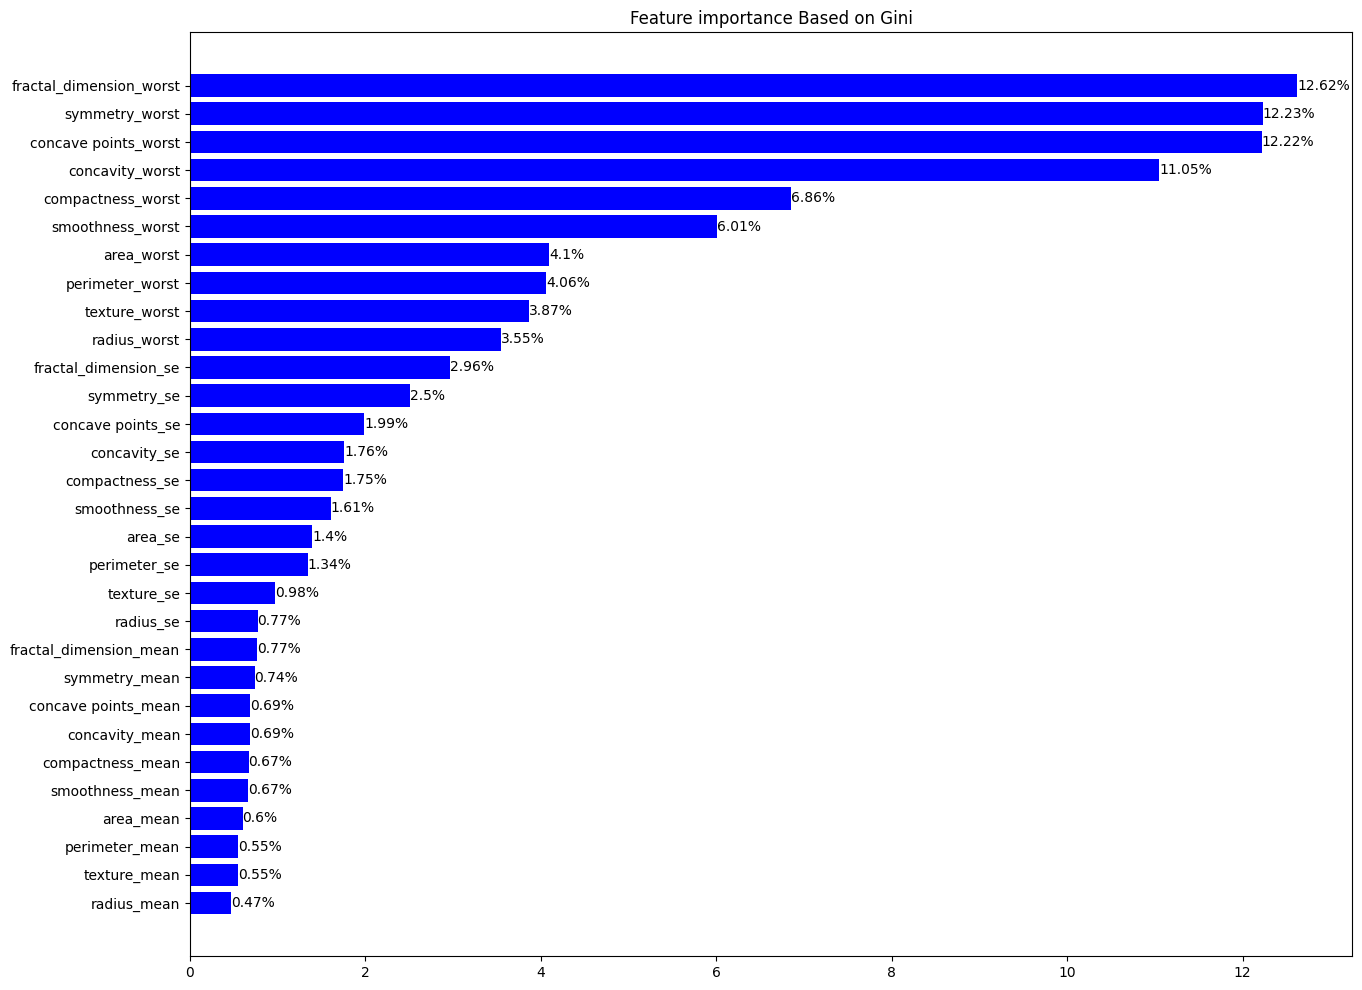

In [49]:
#Feature importance graph
fig, ax = plt.subplots(figsize =(15, 12))
plt.title('Feature importance Based on Gini')
plt.barh('column_name','percentage_impurity',data=impurity_df,align = 'center',color = 'blue')
for i , val in enumerate(impurity_df['percentage_impurity']):
  plt.text(val,i,f'{round(val,2)}%',va ='center',fontsize =10)
# plt.gca()
plt.show()

In [51]:
# filtering the columns with 90% mean impurity
final_columns = list(impurity_df[impurity_df['mean_impurity']<=90].column_name)

# filtering the x_train and x_test data for the above columns
x_train_filtered = x_train[final_columns]
x_test_filtered = x_test[final_columns]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s



 Training Score:  1.0


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished



Classification Report:                precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



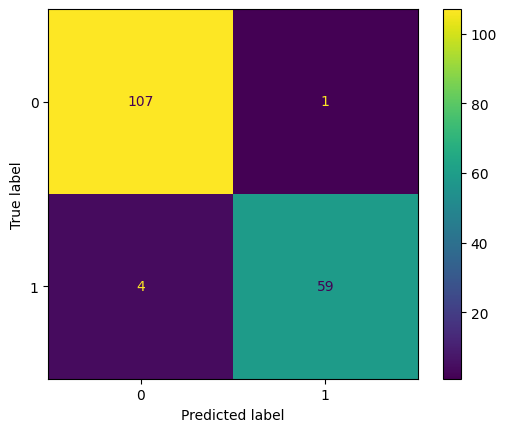

In [52]:
# optimized model
final_params = final_model.get_params()
opt_model = RandomForestClassifier(**final_params)
opt_model.set_params(verbose = 1)

# training the data
opt_model.fit(x_train_filtered,y_train)

# training score
print('\n Training Score: ', opt_model.score(x_train_filtered, y_train) )

# prediction
opt_y_pred = opt_model.predict(x_test_filtered)

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, opt_y_pred)
print('\nClassification Report: ',classification_report(y_test,opt_y_pred))

99.5
95.32
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



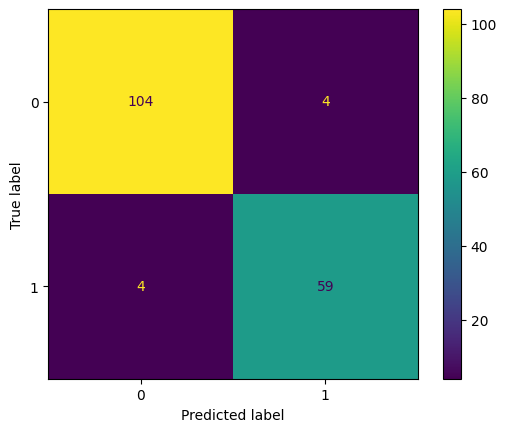

In [54]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training
dt = DecisionTreeClassifier(random_state = 42, max_depth = 4)
dt.fit(x_train_filtered, y_train)
print(round(dt.score(x_train_filtered,y_train)*100,2))

# Testing
dt_pred = dt.predict(x_test_filtered)
print(round(accuracy_score(y_test,dt_pred)*100,2))

# confusion matrix and report
cm  = ConfusionMatrixDisplay.from_predictions(y_test,dt_pred)
report = classification_report(y_test, dt_pred)
print(report)

In [55]:
data['diagnosis'].value_counts(normalize = True)*100

,proportion
diagnosis,
0,62.741652
1,37.258348
